# Anomaly Detection
Anomaly detection is the identification of data points, items, observations or events that do not conform to the expected pattern of a given group. These anomalies occur very infrequently but may signify a large and significant threat such as cyber intrusions or fraud.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Dataset:
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.preprocessing import StandardScaler
from sklearn.utils import compute_class_weight

from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from keras import regularizers

In [ ]:
# Reproducible random seed
seed = 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

### Training on a sample of dataset

In [ ]:
data = dataset.sample(frac = 0.1,random_state=1)

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.shape

(284807, 31)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [ ]:
data.shape

(28481, 31)

In [ ]:
dataset.iloc[:,1].head()

0   -1.359807
1    1.191857
2   -1.358354
3   -0.966272
4   -1.158233
Name: V1, dtype: float64

In [ ]:
data.iloc[:, 1:29] = StandardScaler().fit_transform(data.iloc[:, 1:29])

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.306107,-0.439676,-0.098900,-0.158613,1.464853,-1.515790,0.243298,-0.431848,0.313239,...,-0.107351,0.053305,0.590205,0.043160,-4.263295,-0.421802,0.163019,0.700576,1.79,0
127467,78340.0,-0.407865,0.782617,0.872779,0.018960,-0.192905,-0.492612,0.266786,0.364606,-0.654683,...,-0.179069,-0.515362,0.141119,0.668547,-0.499581,0.155396,0.392344,0.197769,1.98,0
137900,82382.0,-0.158952,0.665239,0.636588,-0.089721,0.419360,-0.401598,0.577723,-0.051430,-0.435166,...,-0.416448,-1.073095,-0.191027,-0.816383,-0.033094,0.239504,0.599427,0.300553,0.89,0
21513,31717.0,-0.665352,0.606586,1.165767,-1.108850,-0.073112,-0.345603,0.558014,-0.023753,0.336375,...,-0.302868,-0.584641,-0.369548,0.020851,0.448934,1.658087,0.240226,-0.000369,15.98,0
134700,80923.0,0.640649,0.371798,-0.380223,0.618899,0.055443,-1.105377,0.308929,-0.236001,-0.090182,...,-0.221424,-0.600282,-0.118038,0.432703,1.062261,0.749626,-0.077854,0.142592,0.76,0


In [ ]:
data = data.to_numpy()

In [ ]:
data

array([[ 1.19907000e+05, -3.06107113e-01, -4.39675929e-01, ...,
         7.00576493e-01,  1.79000000e+00,  0.00000000e+00],
       [ 7.83400000e+04, -4.07865420e-01,  7.82617351e-01, ...,
         1.97769054e-01,  1.98000000e+00,  0.00000000e+00],
       [ 8.23820000e+04, -1.58952414e-01,  6.65239492e-01, ...,
         3.00552579e-01,  8.90000000e-01,  0.00000000e+00],
       ...,
       [ 3.16900000e+03, -1.57621901e-01,  6.27607078e-01, ...,
         5.29140680e-01,  1.96000000e+01,  0.00000000e+00],
       [ 9.87520000e+04, -1.79445897e+00,  2.41027326e+00, ...,
         1.11069978e+00,  9.20000000e-01,  0.00000000e+00],
       [ 6.61870000e+04,  6.08882342e-01,  1.43627505e-01, ...,
         6.70138260e-02,  1.93400000e+01,  0.00000000e+00]])

In [ ]:
X = data[:,1:29]
Y = data[:,30]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= [0, 1] , y = Y)
class_weights = dict(zip([0, 1], class_weights))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42, stratify=Y_train)

In [ ]:

print('Train set shape: ', X_train.shape, Y_train.shape)
print('Test set shape: ', X_test.shape, Y_test.shape)
print('Cross validation set shape: ', X_cv.shape, Y_cv.shape)

Train set shape:  (17088, 28) (17088,)
Test set shape:  (5697, 28) (5697,)
Cross validation set shape:  (5696, 28) (5696,)


In [ ]:
def generate_model():
    model = Sequential([
    Dense(20, input_dim = 28, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer
])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['f1'])
    return model

In [ ]:
baselogger = BaseLogger()
earlystop = EarlyStopping(monitor='val_f1', patience = 3,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_f1', factor=0.2, patience = 3,verbose=1)
callbacks_list = [earlystop, reduce_lr]

NameError: ignored

In [ ]:
model = generate_model()

model.fit(X_train, Y_train, epochs=20, class_weight = class_weights, verbose=1, validation_data=(X_cv, Y_cv))

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

In [ ]:
print(classification_report(Y_test, Y_pred))

### Training the model on complete dataset

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
dataset.shape

(284807, 31)

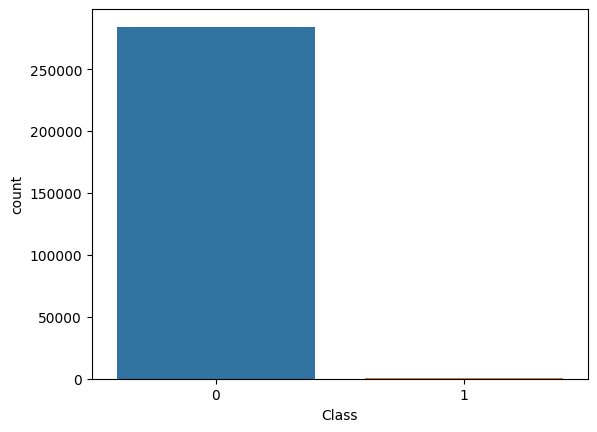

0    284315
1       492
Name: Class, dtype: int64


In [ ]:
sns.countplot(data = dataset, x = 'Class')
plt.show()
print(dataset.Class.value_counts())

Only Time and Amount have not been transformed with PCA. Time contains the seconds elapsed between each transaction and the first transaction in the dataset. Lets transofrm this feature into hours to get a better understanding.

<ipython-input-7-8004afceadaf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['Class'] == 0]["Time_hour"], color='g')
<ipython-input-7-8004afceadaf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['Class'] == 1]["Time_hour"], color='r')


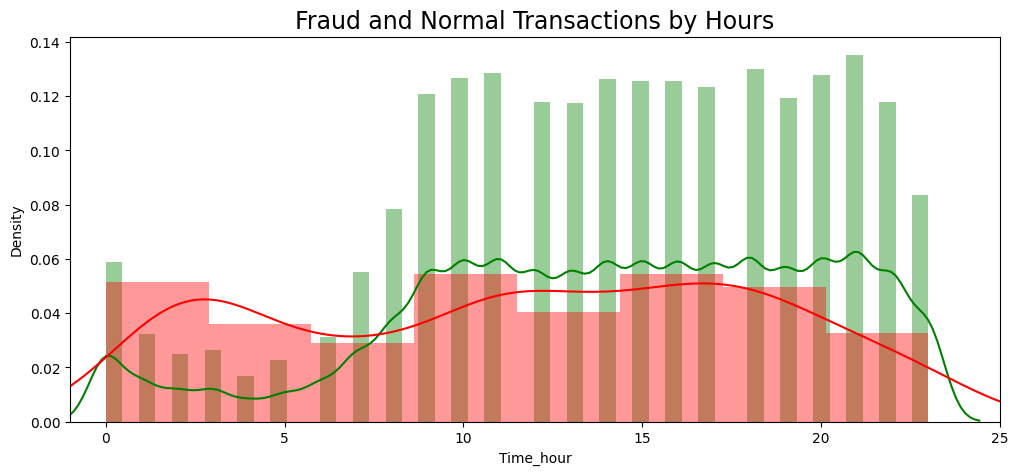

In [ ]:
timedelta = pd.to_timedelta(dataset['Time'], unit='s')
dataset['Time_hour'] = (timedelta.dt.components.hours).astype(int)

plt.figure(figsize=(12,5))
sns.distplot(dataset[dataset['Class'] == 0]["Time_hour"], color='g')
sns.distplot(dataset[dataset['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud and Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

Seems like hour of day have some impact on number or fraud cases. More fraud transactions occur at midnight and working hours of 10AM to 6PM

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [ ]:
X = dataset.drop(['Class','Amount','Time','Time_hour'],axis = 1)

Y = dataset.Class

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X.shape

(284807, 28)

In [ ]:
class_weights = compute_class_weight(class_weight = "balanced", classes= [0, 1] , y = Y)
class_weights = dict(zip([0, 1], class_weights))

In [ ]:
print(class_weights)

{0: 0.5008652375006595, 1: 289.4380081300813}


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.11, random_state=42, stratify=Y_train)

In [ ]:
print('Train set shape: ', X_train.shape, Y_train.shape)
print('Test set shape: ', X_test.shape, Y_test.shape)
print('Cross validation set shape: ', X_cv.shape, Y_cv.shape)

Train set shape:  (228130, 28) (228130,)
Test set shape:  (28481, 28) (28481,)
Cross validation set shape:  (28196, 28) (28196,)


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=15,
    mode='min')

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10)

In [ ]:
def generate_model():
    model = Sequential([
    Dense(20, input_dim = 28, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer
])
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['Precision','Recall'])
    return model

In [ ]:
model = generate_model()

history = model.fit(X_train, Y_train, batch_size=128, epochs=100, class_weight=class_weights, verbose=1, validation_data=(X_cv, Y_cv),callbacks = [early_stopping,reduce_lr])

Epoch 1/100
1783/1783 [==============================] - 7s 3ms/step - loss: 0.4639 - precision: 0.0220 - recall: 0.7386 - val_loss: 0.1850 - val_precision: 0.0446 - val_recall: 0.9388 - lr: 0.0010
Epoch 2/100
1783/1783 [==============================] - 6s 3ms/step - loss: 0.1945 - precision: 0.0343 - recall: 0.9036 - val_loss: 0.1105 - val_precision: 0.0547 - val_recall: 0.9184 - lr: 0.0010
Epoch 3/100
1783/1783 [==============================] - 4s 2ms/step - loss: 0.1726 - precision: 0.0378 - recall: 0.9188 - val_loss: 0.0951 - val_precision: 0.0605 - val_recall: 0.9184 - lr: 0.0010
Epoch 4/100
1783/1783 [==============================] - 5s 3ms/step - loss: 0.1559 - precision: 0.0462 - recall: 0.9213 - val_loss: 0.1114 - val_precision: 0.0447 - val_recall: 0.9388 - lr: 0.0010
Epoch 5/100
1783/1783 [==============================] - 11s 6ms/step - loss: 0.1402 - precision: 0.0420 - recall: 0.9264 - val_loss: 0.1104 - val_precision: 0.0447 - val_recall: 0.9388 - lr: 0.0010
Epoch 6/1

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.99)

891/891 [==============================] - 2s 3ms/step


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.77      0.82      0.79        49

    accuracy                           1.00     28481
   macro avg       0.88      0.91      0.90     28481
weighted avg       1.00      1.00      1.00     28481



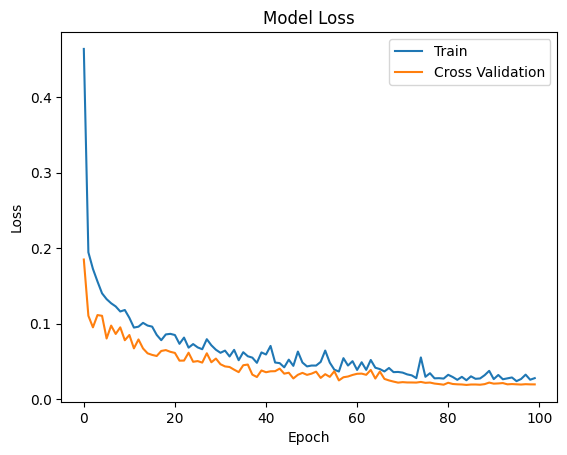

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross Validation'], loc='upper right')
plt.show()

#Using Autoencoder

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Defining the input layer
input_layer = Input(shape=(28,))  #input dimension = dimension of input data

# Encoder layers
encoded = Dense(45, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(30, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)

# Decoder layers
decoded = Dense(20, activation='relu')(encoded)
decoded = Dense(28, activation='relu')(decoded)


autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics = ['accuracy'])

autoencoder.fit(X_train, X_train, epochs=200, batch_size=512, shuffle=True ,validation_data=(X_cv, X_cv),callbacks = [early_stopping,reduce_lr])

Epoch 1/200
446/446 [==============================] - 3s 4ms/step - loss: 0.8024 - accuracy: 0.4166 - val_loss: 0.6866 - val_accuracy: 0.6232 - lr: 0.0010
Epoch 2/200
446/446 [==============================] - 1s 3ms/step - loss: 0.6491 - accuracy: 0.6763 - val_loss: 0.6409 - val_accuracy: 0.7207 - lr: 0.0010
Epoch 3/200
446/446 [==============================] - 2s 4ms/step - loss: 0.6141 - accuracy: 0.7530 - val_loss: 0.6191 - val_accuracy: 0.7757 - lr: 0.0010
Epoch 4/200
446/446 [==============================] - 2s 5ms/step - loss: 0.6003 - accuracy: 0.7894 - val_loss: 0.6124 - val_accuracy: 0.7959 - lr: 0.0010
Epoch 5/200
446/446 [==============================] - 2s 4ms/step - loss: 0.5944 - accuracy: 0.8084 - val_loss: 0.6087 - val_accuracy: 0.8084 - lr: 0.0010
Epoch 6/200
446/446 [==============================] - 1s 3ms/step - loss: 0.5904 - accuracy: 0.8212 - val_loss: 0.6046 - val_accuracy: 0.8232 - lr: 0.0010
Epoch 7/200
446/446 [==============================] - 1s 3ms/st

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense (Dense)               (None, 45)                1305      
                                                                 
 dense_1 (Dense)             (None, 30)                1380      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 28)                588       
                                                                 
Total params: 3893 (15.21 KB)
Trainable params: 3893 (15.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
new_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-2].output)
new_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-3].output)

In [ ]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense (Dense)               (None, 45)                1305      
                                                                 
 dense_1 (Dense)             (None, 30)                1380      
                                                                 
Total params: 2685 (10.49 KB)
Trainable params: 2685 (10.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train_new = new_model.predict(X_train)

7130/7130 [==============================] - 12s 2ms/step


In [ ]:
X_cv_new = new_model.predict(X_cv)

882/882 [==============================] - 2s 2ms/step


In [ ]:
X_train_new.shape,X_train.shape

((228130, 30), (228130, 28))

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
Fraud = dataset[dataset['Class']==1]

Valid = dataset[dataset['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
outlier_fraction

0.0017304750013189597

In [ ]:
ISF = IsolationForest(n_estimators=100, contamination = 0.0017)
ISF.fit(X_train_new)

IsolationForest(contamination=0.0017)

In [ ]:
Y_pred = ISF.predict(X_cv_new)

In [ ]:
Y_pred[Y_pred == 1] = 0
Y_pred[Y_pred == -1] = 1

In [ ]:
pd.Series(Y_pred).unique()

array([0, 1])

In [ ]:
Y_pred.shape

(28196,)

In [ ]:
Y_train.shape

(228130,)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(precision_score(Y_cv,Y_pred),recall_score(Y_cv,Y_pred))
f1_score(Y_cv,Y_pred)


0.68 0.6938775510204082


0.686868686868687

In [ ]:
# from tensorflow.keras.models import load_model
# new_model.save('model2layer68.h5')
# new_model.save('model2layer68.keras')

In [ ]:
# import joblib
# joblib.dump(ISF, 'ISF68.pkl')

['ISF68.pkl']